In [2]:
# Import pandas as a alias 'pd'
import pandas as pd


# Load the CSV file "USA_Housing.csv"
heart = pd.read_csv("./Desktop/Data Science/csv_file/heart.csv")

heart.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [3]:
from sklearn.model_selection import train_test_split
X = heart[['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']]
y = heart[['target']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [4]:
dfX = pd.DataFrame(X_test)
dfy = pd.DataFrame(y_test, columns=["target"])

In [7]:
df = pd.concat([dfX, dfy], axis=1)

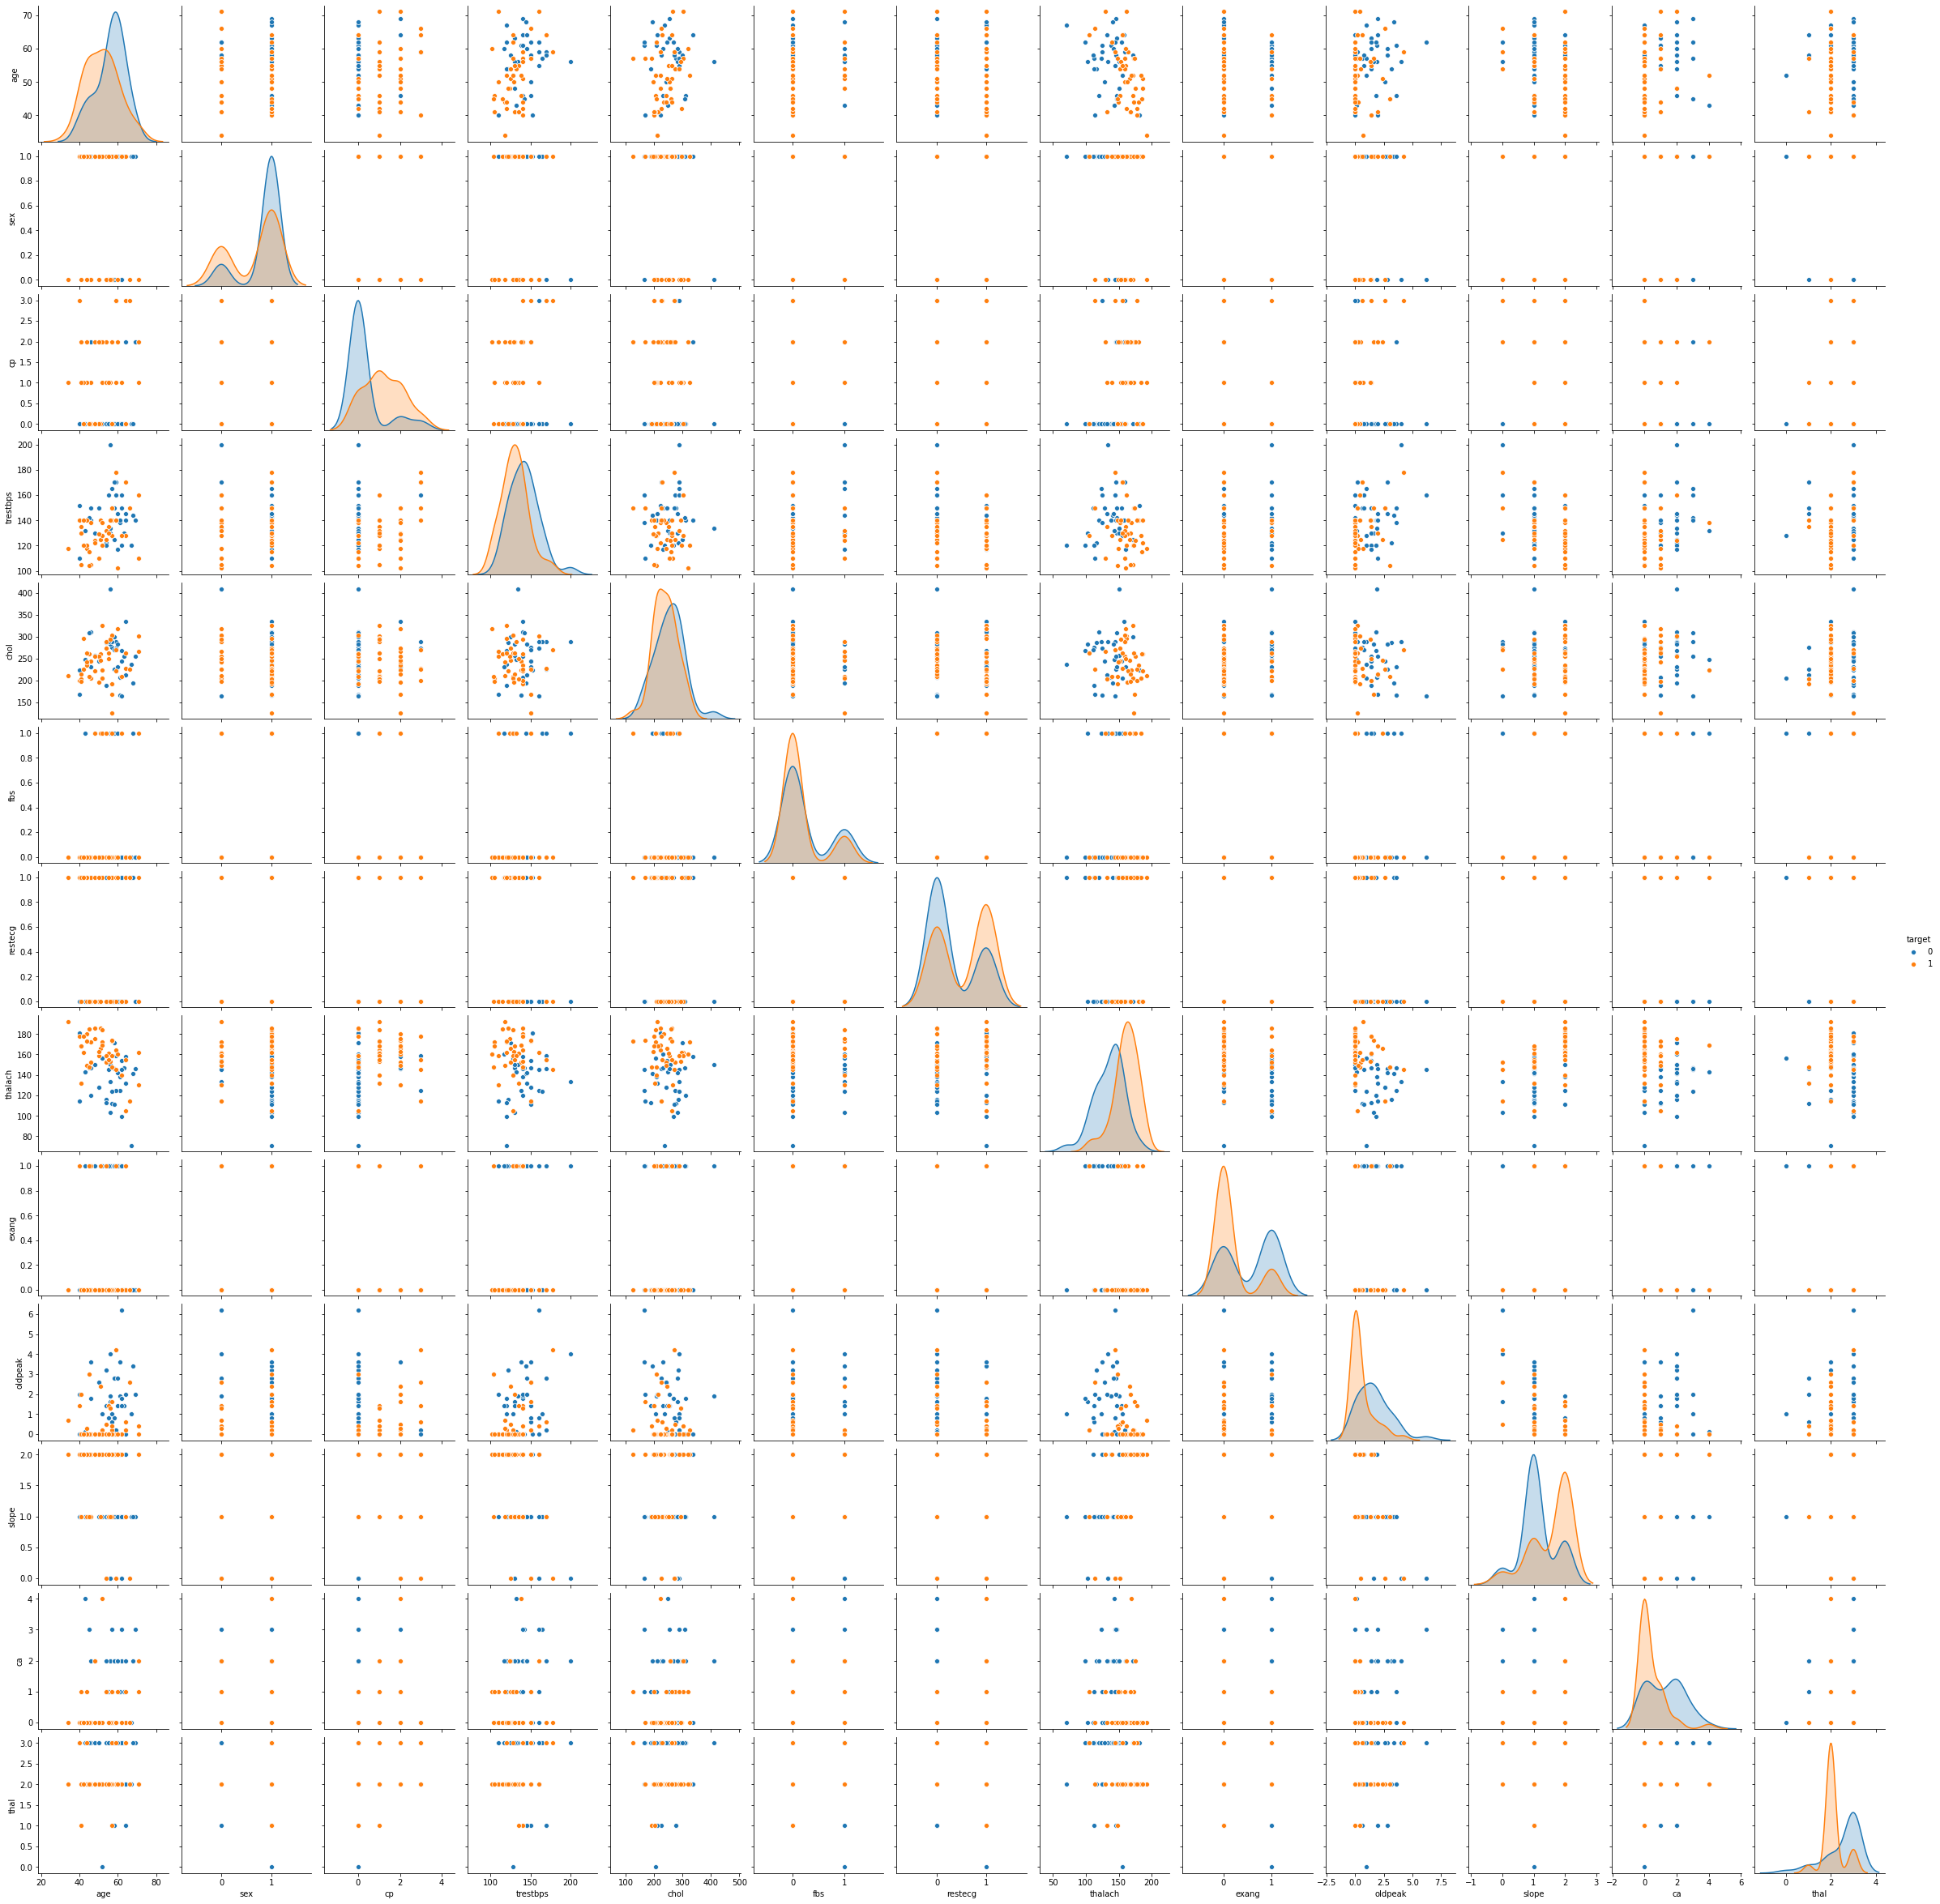

In [8]:
import seaborn as sns
import matplotlib.pylab as plt

sns.pairplot(df, hue="target")
plt.show()